In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('training_data.csv')

# Display the first few rows of the DataFrame
print(df.head())


    Enc_Cost  Real_Cost  Utterance_Len  Dec_Cost_v2   Utility
0  12.335861  10.233417         59.125     0.850675  0.648126
1  12.415994  10.545550         59.750     1.044366  0.559630
2  12.259924  10.321527         59.625     0.915962  0.452426
3  12.455919  10.547065         53.375     0.929832  0.584388
4  12.397828  10.247561         64.000     0.759127  0.670300


Encoding cost at the beginning of training: 12.335861206054688
Encoding cost at the end of training: 12.19602822638204
Percentage change in Encoding cost from beginning to end of training: -1.1335485811401182%

Realisation cost at the beginning of training: 10.233416557312012
Realisation cost at the end of training: 9.76459635328804
Percentage change in Realisation cost from beginning to end of training: -4.581267667531711%

Utterance length at the beginning of training: 59.125
Utterance length at the end of training: 56.87866810048511
Percentage change in Utterance length from beginning to end of training: -3.7992928533021435%

Decoding cost at the beginning of training: 0.8506752848625183
Decoding cost at the end of training: 1.346167144553726
Percentage change in Decoding cost from beginning to end of training: 58.24688556354221%

Utility at the beginning of training: 0.6481263041496277
Utility at the end of training: 0.5541537368435775
Percentage change in Utility from beginning to

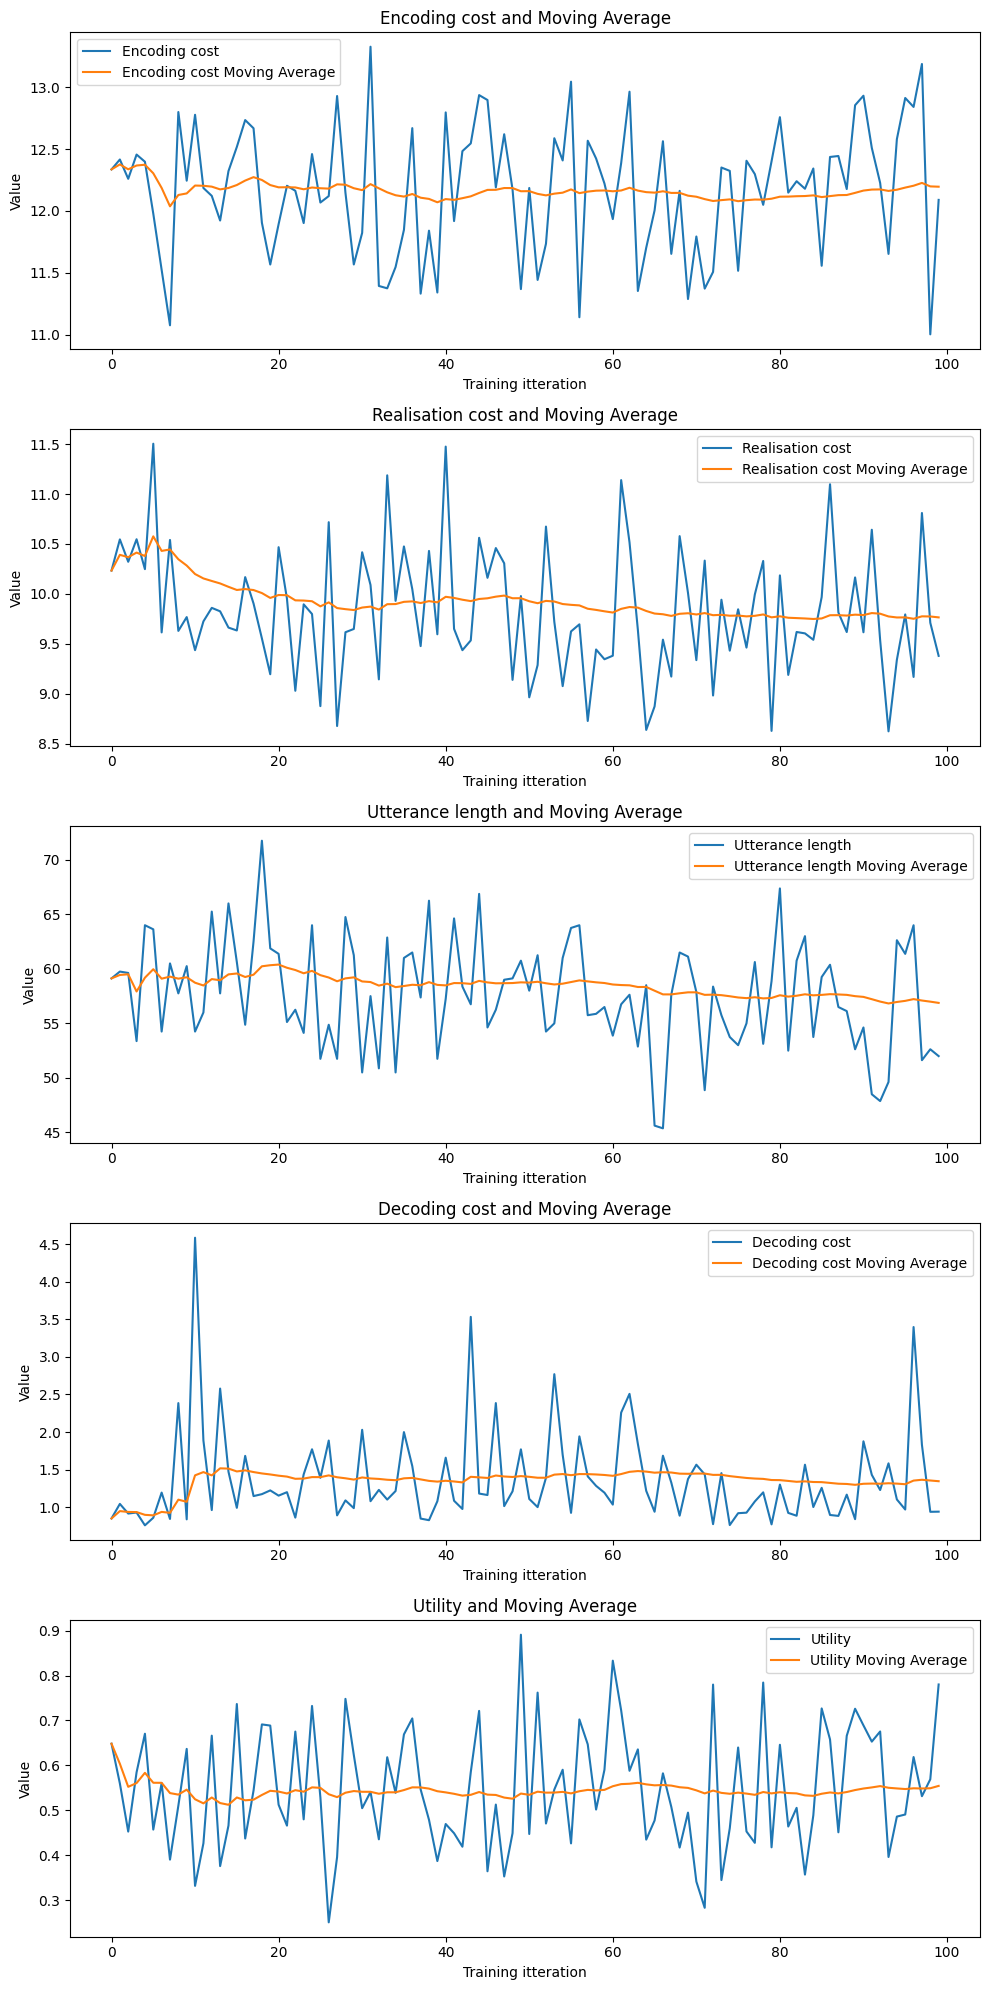

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('training_data.csv')

# Rename columns for better readability
df = df.rename(columns={
    'Enc_Cost': 'Encoding cost',
    'Real_Cost': 'Realisation cost',
    'Utterance_Len': 'Utterance length',
    'Dec_Cost_v2': 'Decoding cost',
    'Utility': 'Utility'
})

# Calculate the exponential moving average with a span equivalent to half the number of data points
span_size = len(df) // 1
df_ema = df.ewm(span=span_size).mean()

# Create a subplot for each column
fig, axs = plt.subplots(5, 1, figsize=(10, 20))  # Adjust size (width, height) as needed

# For each column
for i, col in enumerate(df.columns):
    # Compare the values at the beginning and end of training
    beginning_value = df_ema[col].iloc[0]  # the first point
    end_value = df_ema[col].iloc[-1]  # the last point
    print(f'{col} at the beginning of training: {beginning_value}')
    print(f'{col} at the end of training: {end_value}')

    # Calculate and print the percentage change from beginning to end
    pct_change = ((end_value - beginning_value) / beginning_value) * 100
    print(f'Percentage change in {col} from beginning to end of training: {pct_change}%\n')

    # Plot the column data and its exponential moving average in a separate subplot
    axs[i].plot(df[col], label=f'{col}')
    axs[i].plot(df_ema[col], label=f'{col} Moving Average')
    axs[i].set_title(f'{col} and Moving Average')
    axs[i].set_xlabel('Training itteration')  # assuming that the index of your DataFrame is meaningful
    axs[i].set_ylabel('Value')
    axs[i].legend()

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataframe
df = pd.read_csv('training_data.csv')

# Calculate the exponential moving average with a span equivalent to half the number of data points
span_size = len(df) // 2
df_ema = df.ewm(span=span_size).mean()

# List of all columns
cols = ['Enc_Cost', 'Real_Cost', 'Utterance_Len', 'Dec_Cost_v2', 'Utility']

# Print the beginning and end values of each column
for col in cols:
    print(f'---- {col} ----')
    print(f'Raw Data - Beginning: {df[col].iloc[0]}, End: {df[col].iloc[-1]}')
    print(f'Exponential Moving Average - Beginning: {df_ema[col].iloc[0]}, End: {df_ema[col].iloc[-1]}\n')


---- Enc_Cost ----
Raw Data - Beginning: 12.335861206054688, End: 12.089522361755373
Exponential Moving Average - Beginning: 12.335861206054688, End: 12.232057310575877

---- Real_Cost ----
Raw Data - Beginning: 10.233416557312012, End: 9.379165649414062
Exponential Moving Average - Beginning: 10.233416557312012, End: 9.737996116311916

---- Utterance_Len ----
Raw Data - Beginning: 59.125, End: 52.0
Exponential Moving Average - Beginning: 59.125, End: 56.33239109306997

---- Dec_Cost_v2 ----
Raw Data - Beginning: 0.8506752848625183, End: 0.9410911202430724
Exponential Moving Average - Beginning: 0.8506752848625183, End: 1.3324586314628717

---- Utility ----
Raw Data - Beginning: 0.6481263041496277, End: 0.7800161242485046
Exponential Moving Average - Beginning: 0.6481263041496277, End: 0.5617153896115095



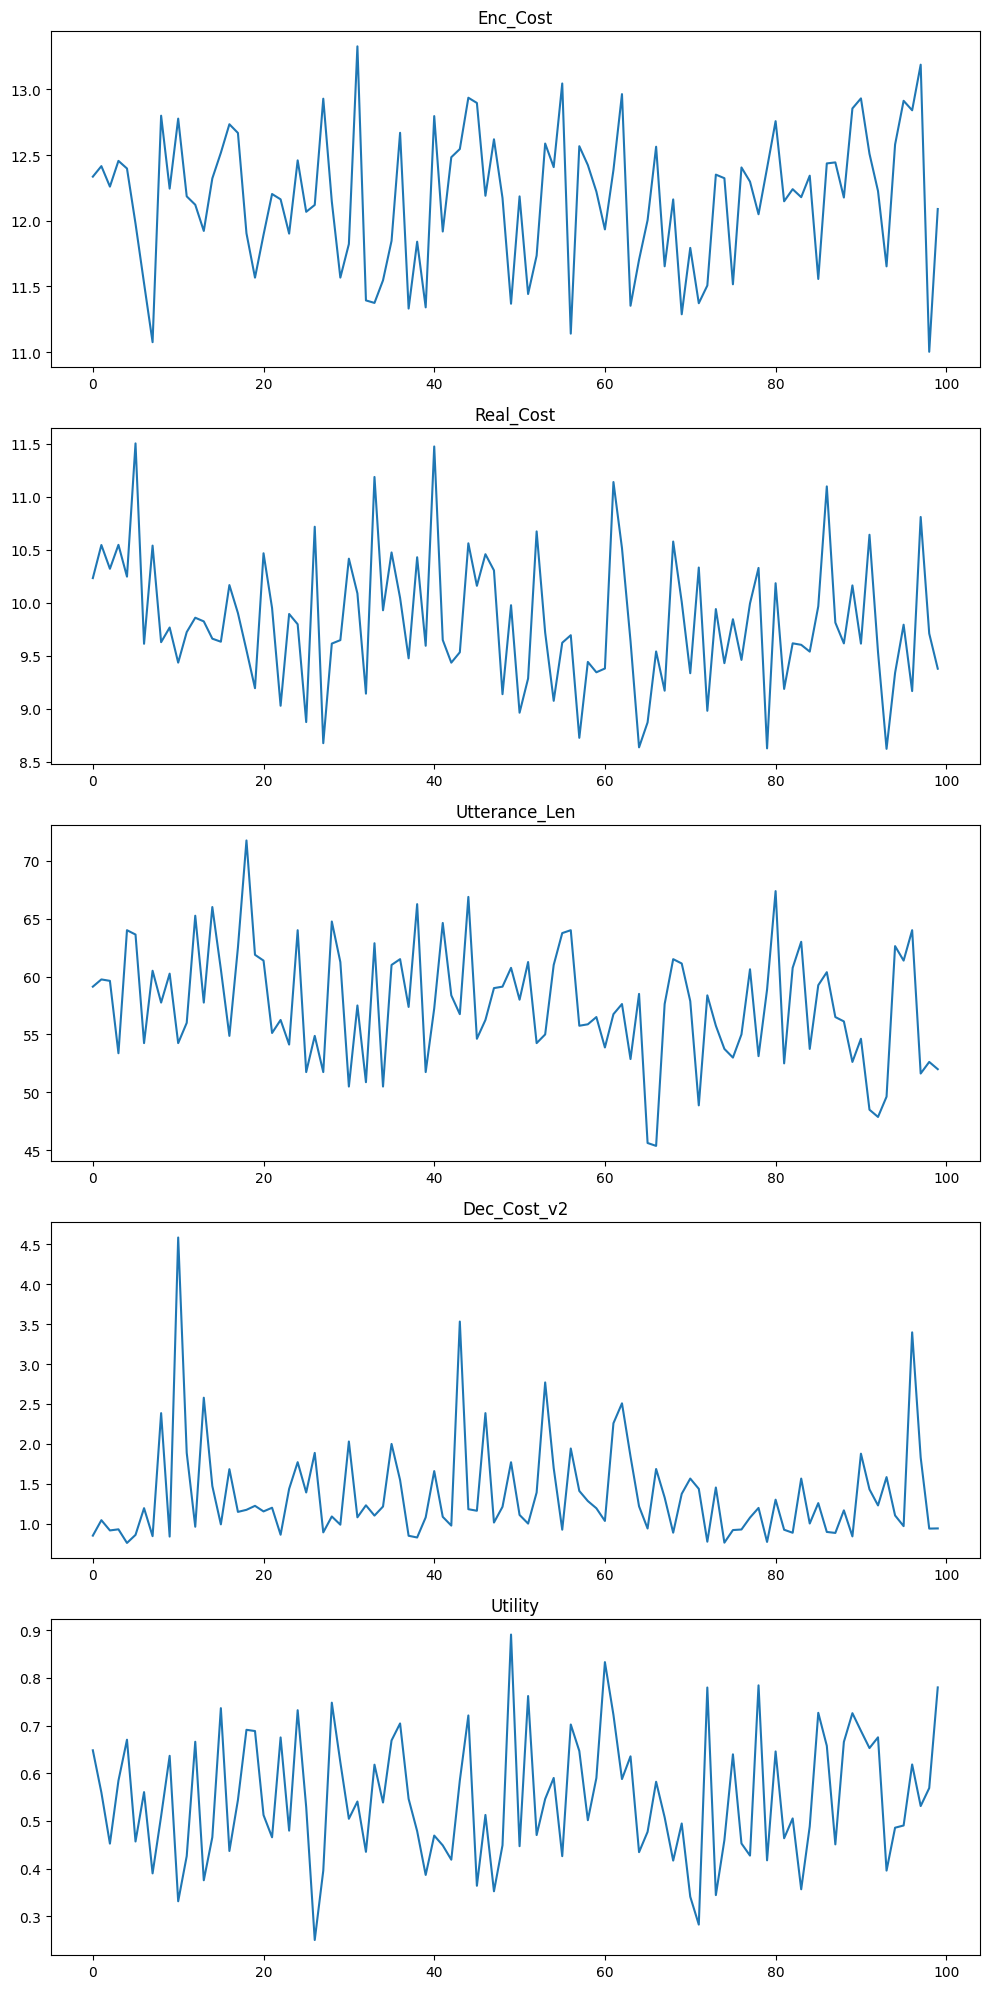

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('training_data.csv')

# Create a subplot for each column
fig, axs = plt.subplots(5, 1, figsize=(10, 20))  # Adjust size (width, height) as needed

# Plot each column in a separate subplot
axs[0].plot(df['Enc_Cost'])
axs[0].set_title('Enc_Cost')

axs[1].plot(df['Real_Cost'])
axs[1].set_title('Real_Cost')

axs[2].plot(df['Utterance_Len'])
axs[2].set_title('Utterance_Len')

axs[3].plot(df['Dec_Cost_v2'])
axs[3].set_title('Dec_Cost_v2')

axs[4].plot(df['Utility'])
axs[4].set_title('Utility')

# Display the plot
plt.tight_layout()
plt.show()
